In [1]:
import numpy as np ## Linear Algebra
import pandas as pd  ## To work with Data
import plotly.express as px  ## Visualization
import plotly.graph_objects as go ## Visualization
import matplotlib.pyplot as plt ## Visualization
import plotly as py ## Visualization
import os
import seaborn as sns ## Visualization

In [2]:
data=pd.read_csv('crop_production.csv')
data

State_Name District_Name  Crop_Year       Season  \
0       Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
1       Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
2       Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
3       Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    
4       Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    
...                             ...           ...        ...          ...   
246086                  West Bengal       PURULIA       2014  Summer        
246087                  West Bengal       PURULIA       2014  Summer        
246088                  West Bengal       PURULIA       2014  Whole Year    
246089                  West Bengal       PURULIA       2014  Winter        
246090                  West Bengal       PURULIA       2014  Winter        

                       Crop      Area  Production  
0                  Arecanut    1254.0      2000.0  
1       Other Kharif pulses       2.0         1.0  
2                      Rice     102.0       321.0  
3                    Banana     176.0       641.0  
4                 Cashewnut     720.0       165.0  
...                     ...       ...         ...  
246086                 Rice     306.0       801.0  
246087              Sesamum     627.0       463.0  
246088            Sugarcane     324.0     16250.0  
246089                 Rice  279151.0    597899.0  
246090              Sesamum     175.0        88.0  

[246091 rows x 7 columns]

In [3]:
data.head()

State_Name District_Name  Crop_Year       Season  \
0  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
1  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
2  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
3  Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    
4  Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    

                  Crop    Area  Production  
0             Arecanut  1254.0      2000.0  
1  Other Kharif pulses     2.0         1.0  
2                 Rice   102.0       321.0  
3               Banana   176.0       641.0  
4            Cashewnut   720.0       165.0

In [4]:
#Basic info about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


In [5]:
#checking null values 
data.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

In [6]:
data['Production'].isnull().sum()

3730

In [7]:
# Dropping the null values

#If null data is less than 5% ,then we can drop it

#3730/246091= 0.01

data.dropna(inplace=True)

In [8]:
data.shape

(242361, 7)

In [9]:
data.isnull().sum()

State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
dtype: int64

## Exploratory Data Analysis

### Checking for correlation between variables

In [10]:
data.corr(numeric_only=True)

Crop_Year      Area  Production
Crop_Year    1.000000 -0.025305    0.006989
Area        -0.025305  1.000000    0.040587
Production   0.006989  0.040587    1.000000

<AxesSubplot:>

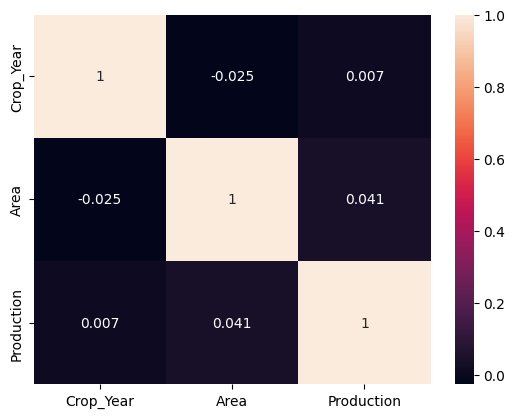

In [11]:
plt.tick_params(labelsize=10)
sns.heatmap(data.corr(numeric_only=True),annot=True)

#### There is no variable showing high correlation with any other variable in dataset

In [12]:
data.columns

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'Production'],
      dtype='object')

In [13]:
#State Wise Production

data.groupby(by='State_Name')['Production'].sum().reset_index().sort_values(by='Production')

State_Name    Production
5                    Chandigarh  6.395650e+04
20                      Mizoram  1.661540e+06
7        Dadra and Nagar Haveli  1.847871e+06
26                       Sikkim  2.435735e+06
18                      Manipur  5.230917e+06
2             Arunachal Pradesh  6.823913e+06
13                    Jharkhand  1.077774e+07
19                    Meghalaya  1.211250e+07
29                      Tripura  1.252292e+07
21                     Nagaland  1.276595e+07
12           Jammu and Kashmir   1.329102e+07
11             Himachal Pradesh  1.780517e+07
6                  Chhattisgarh  1.009519e+08
31                  Uttarakhand  1.321774e+08
22                       Odisha  1.609041e+08
25                    Rajasthan  2.813203e+08
28                   Telangana   3.351479e+08
4                         Bihar  3.664836e+08
10                      Haryana  3.812739e+08
23                   Puducherry  3.847245e+08
16               Madhya Pradesh  4.488407e+08
8                           Goa  5.057558e+08
9                       Gujarat  5.242913e+08
24                       Punjab  5.863850e+08
0   Andaman and Nicobar Islands  7.182232e+08
14                    Karnataka  8.634298e+08
17                  Maharashtra  1.263641e+09
32                  West Bengal  1.397904e+09
3                         Assam  2.111752e+09
30                Uttar Pradesh  3.234493e+09
27                   Tamil Nadu  1.207644e+10
1                Andhra Pradesh  1.732459e+10
15                       Kerala  9.788005e+10

In [14]:
pro=data.groupby(by='State_Name')['Production'].sum().reset_index().sort_values(by='Production')
pro

State_Name    Production
5                    Chandigarh  6.395650e+04
20                      Mizoram  1.661540e+06
7        Dadra and Nagar Haveli  1.847871e+06
26                       Sikkim  2.435735e+06
18                      Manipur  5.230917e+06
2             Arunachal Pradesh  6.823913e+06
13                    Jharkhand  1.077774e+07
19                    Meghalaya  1.211250e+07
29                      Tripura  1.252292e+07
21                     Nagaland  1.276595e+07
12           Jammu and Kashmir   1.329102e+07
11             Himachal Pradesh  1.780517e+07
6                  Chhattisgarh  1.009519e+08
31                  Uttarakhand  1.321774e+08
22                       Odisha  1.609041e+08
25                    Rajasthan  2.813203e+08
28                   Telangana   3.351479e+08
4                         Bihar  3.664836e+08
10                      Haryana  3.812739e+08
23                   Puducherry  3.847245e+08
16               Madhya Pradesh  4.488407e+08
8                           Goa  5.057558e+08
9                       Gujarat  5.242913e+08
24                       Punjab  5.863850e+08
0   Andaman and Nicobar Islands  7.182232e+08
14                    Karnataka  8.634298e+08
17                  Maharashtra  1.263641e+09
32                  West Bengal  1.397904e+09
3                         Assam  2.111752e+09
30                Uttar Pradesh  3.234493e+09
27                   Tamil Nadu  1.207644e+10
1                Andhra Pradesh  1.732459e+10
15                       Kerala  9.788005e+10

In [15]:
px.bar(pro,'State_Name','Production')


### Kerala has the highest crops producing state overall. It has produced more than 500% crop than its runner up state Andhra Pradesh

In [16]:
data.columns

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'Production'],
      dtype='object')

In [17]:
data.groupby('District_Name')['Production'].sum()

District_Name
24 PARAGANAS NORTH    161685857.8
24 PARAGANAS SOUTH    114320886.5
ADILABAD               14818313.0
AGAR MALWA               279001.0
AGRA                   33669079.1
                         ...     
YADGIR                  3093212.0
YAMUNANAGAR            40138619.0
YANAM                  56502137.0
YAVATMAL               21813368.0
ZUNHEBOTO               1115285.0
Name: Production, Length: 646, dtype: float64

In [18]:
data.groupby('District_Name')['Production'].sum().reset_index().sort_values(by='Production')

District_Name    Production
397              MUMBAI  2.000000e+00
415              NAMSAI  7.940000e+02
238           HYDERABAD  3.835000e+03
314              KHUNTI  5.024000e+03
486             RAMGARH  5.472000e+03
..                  ...           ...
286              KANNUR  9.783432e+09
590            THRISSUR  9.923508e+09
587  THIRUVANANTHAPURAM  1.002271e+10
372          MALAPPURAM  1.451840e+10
334           KOZHIKODE  1.528074e+10

[646 rows x 2 columns]

In [19]:
temp=data.groupby('District_Name')['Production'].sum().reset_index().sort_values(by='Production')

In [20]:
temp1=temp.tail()
temp1

District_Name    Production
286              KANNUR  9.783432e+09
590            THRISSUR  9.923508e+09
587  THIRUVANANTHAPURAM  1.002271e+10
372          MALAPPURAM  1.451840e+10
334           KOZHIKODE  1.528074e+10

In [21]:
px.bar(temp1,x='District_Name',y='Production',title='Highest Crop Production District')

In [22]:
#District having highest crop production

In [23]:
trace1=px.bar(temp1,x='District_Name',y='Production',title='Highest Crop Production District')
trace1

In [24]:
#District having lowest crop production

In [25]:
temp2=temp.head()
trace2=px.bar(temp2,x='District_Name',y='Production',title='Lowest Crop Production District')
trace2

## INSIGHT:
### Kozhikode is the highest crop producing district
### Mumbai is the lowest crop produxing district

## Yearwise Crop Production

In [26]:
data.columns

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'Production'],
      dtype='object')

In [27]:
data.groupby('Crop_Year')['Production'].agg('sum')

Crop_Year
1997    8.512329e+08
1998    5.825321e+09
1999    6.434666e+09
2000    7.449709e+09
2001    7.465541e+09
2002    7.696955e+09
2003    7.917974e+09
2004    8.189462e+09
2005    8.043757e+09
2006    8.681913e+09
2007    6.879442e+09
2008    7.717018e+09
2009    7.660494e+09
2010    6.307609e+09
2011    1.430890e+10
2012    8.171055e+09
2013    1.290359e+10
2014    8.664541e+09
2015    6.935065e+06
Name: Production, dtype: float64

In [28]:
yr = data.groupby('Crop_Year')['Production'].agg('sum')
fig = px.line(yr,y='Production',markers=True)
fig.show()

In [29]:
data.groupby('Crop_Year')['Production'].sum()

Crop_Year
1997    8.512329e+08
1998    5.825321e+09
1999    6.434666e+09
2000    7.449709e+09
2001    7.465541e+09
2002    7.696955e+09
2003    7.917974e+09
2004    8.189462e+09
2005    8.043757e+09
2006    8.681913e+09
2007    6.879442e+09
2008    7.717018e+09
2009    7.660494e+09
2010    6.307609e+09
2011    1.430890e+10
2012    8.171055e+09
2013    1.290359e+10
2014    8.664541e+09
2015    6.935065e+06
Name: Production, dtype: float64

## INSIGHT:
### Highest Crop Production is obeserved in year 2011
### Lowest Crop Production is obeserved in year 2015

## Statewise area of cultivation

In [30]:
a=data.groupby('State_Name')['Area'].sum().reset_index().sort_values(by='Area')
fig=px.bar(a,x='State_Name',y='Area',color='Area')
fig.show()

### Insight:

The State with Highest Area Under Cultivation is Uttar Pradesh

The State with Lowest Area Under Cultivation is Kerala

In [31]:
data.head()

State_Name District_Name  Crop_Year       Season  \
0  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
1  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
2  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
3  Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    
4  Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    

                  Crop    Area  Production  
0             Arecanut  1254.0      2000.0  
1  Other Kharif pulses     2.0         1.0  
2                 Rice   102.0       321.0  
3               Banana   176.0       641.0  
4            Cashewnut   720.0       165.0

In [32]:
a=data.groupby('Crop_Year')['Area'].mean().reset_index().sort_values(by='Area')

In [33]:
a.head(n=3)

Crop_Year         Area
18       2015  8200.174688
5        2002  9514.310063
6        2003  9905.217197

<AxesSubplot:xlabel='Crop_Year', ylabel='Area'>

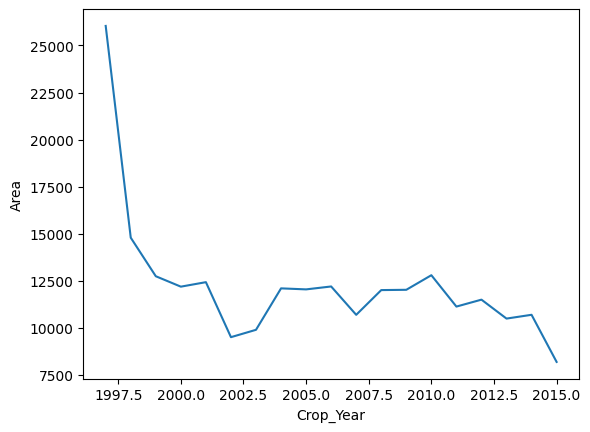

In [34]:
sns.lineplot(a,x='Crop_Year',y='Area')

## Area under agriculture over the years

In [35]:
data.columns

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'Production'],
      dtype='object')

In [36]:
b=data.groupby('Crop_Year')['Area'].mean().reset_index()

px.line(b,'Crop_Year','Area',markers=True,title='Area under agriculture by Year')

In [37]:
data

State_Name District_Name  Crop_Year       Season  \
0       Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
1       Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
2       Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
3       Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    
4       Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    
...                             ...           ...        ...          ...   
246086                  West Bengal       PURULIA       2014  Summer        
246087                  West Bengal       PURULIA       2014  Summer        
246088                  West Bengal       PURULIA       2014  Whole Year    
246089                  West Bengal       PURULIA       2014  Winter        
246090                  West Bengal       PURULIA       2014  Winter        

                       Crop      Area  Production  
0                  Arecanut    1254.0      2000.0  
1       Other Kharif pulses       2.0         1.0  
2                      Rice     102.0       321.0  
3                    Banana     176.0       641.0  
4                 Cashewnut     720.0       165.0  
...                     ...       ...         ...  
246086                 Rice     306.0       801.0  
246087              Sesamum     627.0       463.0  
246088            Sugarcane     324.0     16250.0  
246089                 Rice  279151.0    597899.0  
246090              Sesamum     175.0        88.0  

[242361 rows x 7 columns]

In [38]:
b=data.groupby('Crop_Year')['Area'].sum().reset_index()

px.line(b,'Crop_Year','Area',markers=True,title='Area under agriculture by Year')

## Seasonal Crop production

In [39]:
data.columns

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'Production'],
      dtype='object')

In [40]:
data.head()

State_Name District_Name  Crop_Year       Season  \
0  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
1  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
2  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
3  Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    
4  Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    

                  Crop    Area  Production  
0             Arecanut  1254.0      2000.0  
1  Other Kharif pulses     2.0         1.0  
2                 Rice   102.0       321.0  
3               Banana   176.0       641.0  
4            Cashewnut   720.0       165.0

In [41]:
data.groupby('Season')['Production'].sum().reset_index().sort_values(by='Production')

Season    Production
0  Autumn       6.441377e+07
3  Summer       1.706579e+08
5  Winter       4.345498e+08
2  Rabi         2.051688e+09
1  Kharif       4.029970e+09
4  Whole Year   1.344248e+11

In [42]:
temp=data.groupby('Season')['Production'].sum().reset_index().sort_values(by='Production')
fig=px.bar(temp,x='Season',y='Production')
fig.show()

## Top Crops that are produced in India

In [43]:
data.columns

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'Production'],
      dtype='object')

In [44]:
data.head(n=3)

State_Name District_Name  Crop_Year       Season  \
0  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
1  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
2  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        

                  Crop    Area  Production  
0             Arecanut  1254.0      2000.0  
1  Other Kharif pulses     2.0         1.0  
2                 Rice   102.0       321.0

In [45]:
c=data.groupby('Crop')['Production'].sum().reset_index().sort_values('Production')
fig=px.bar(c,'Crop','Production',title='Top Crops Produced in India')
fig.show()

In [46]:
c=data.groupby('Crop')['Production'].sum().reset_index().sort_values('Production')
fig=px.bar(c.tail(5),'Crop','Production',title='Top Crops Produced in India',color='Production')
fig.show()

#### Coconut is the highest produced crop in India. It is followed by Sugarcane,Rice and Wheat

In [47]:
crop=data['Crop']

def cat_crop(crop):
    for i in ['Rice','Maize','Wheat','Barley','Varagu','Other Cereals & Millets','Ragi','Small millets','Bajra','Jowar', 'Paddy','Total foodgrain','Jobster']:
        if crop==i:
            return 'Cereal'
    for i in ['Moong','Urad','Arhar/Tur','Peas & beans','Masoor',
              'Other Kharif pulses','other misc. pulses','Ricebean (nagadal)',
              'Rajmash Kholar','Lentil','Samai','Blackgram','Korra','Cowpea(Lobia)',
              'Other  Rabi pulses','Other Kharif pulses','Peas & beans (Pulses)','Pulses total','Gram']:
        if crop==i:
            return 'Pulses'
    for i in ['Peach','Apple','Litchi','Pear','Plums','Ber','Sapota','Lemon','Pome Granet',
               'Other Citrus Fruit','Water Melon','Jack Fruit','Grapes','Pineapple','Orange',
               'Pome Fruit','Citrus Fruit','Other Fresh Fruits','Mango','Papaya','Coconut','Banana']:
        if crop==i:
            return 'Fruits'
    for i in ['Bean','Lab-Lab','Moth','Guar seed','Soyabean','Horse-gram']:
        if crop==i:
            return 'Beans'
    for i in ['Turnip','Peas','Beet Root','Carrot','Yam','Ribed Guard','Ash Gourd ','Pump Kin','Redish','Snak Guard','Bottle Gourd',
              'Bitter Gourd','Cucumber','Drum Stick','Cauliflower','Beans & Mutter(Vegetable)','Cabbage',
              'Bhindi','Tomato','Brinjal','Khesari','Sweet potato','Potato','Onion','Tapioca','Colocosia']:
              if crop==i:
                return 'Vegetables'
    for i in ['Perilla','Ginger','Cardamom','Black pepper','Dry ginger','Garlic','Coriander','Turmeric','Dry chillies','Cond-spcs other']:
        if crop==i:
            return 'spices'
    for i in ['other fibres','Kapas','Jute & mesta','Jute','Mesta','Cotton(lint)','Sannhamp']:
        if crop==i:
            return 'fibres'
    for i in ['Arcanut (Processed)','Atcanut (Raw)','Cashewnut Processed','Cashewnut Raw','Cashewnut','Arecanut','Groundnut']:
        if crop==i:
            return 'Nuts'
    for i in ['other oilseeds','Safflower','Niger seed','Castor seed','Linseed','Sunflower','Rapeseed &Mustard','Sesamum','Oilseeds total']:
        if crop==i:
            return 'oilseeds'
    for i in ['Tobacco','Coffee','Tea','Sugarcane','Rubber']:
        if crop==i:
            return 'Commercial'

data['cat_crop']=data['Crop'].apply(cat_crop)

In [48]:
data["cat_crop"].value_counts()


cat_crop
Cereal        63283
Pulses        40898
oilseeds      33801
Vegetables    23154
spices        21638
Nuts          11472
Commercial    10561
fibres         9785
Beans          9115
Fruits         6153
Name: count, dtype: int64

In [49]:
data.head()

State_Name District_Name  Crop_Year       Season  \
0  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
1  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
2  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
3  Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    
4  Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    

                  Crop    Area  Production cat_crop  
0             Arecanut  1254.0      2000.0     Nuts  
1  Other Kharif pulses     2.0         1.0   Pulses  
2                 Rice   102.0       321.0   Cereal  
3               Banana   176.0       641.0   Fruits  
4            Cashewnut   720.0       165.0     Nuts

In [50]:
d=data.groupby('cat_crop')['Production'].agg('count')
d.head()

cat_crop
Beans          9115
Cereal        63283
Commercial    10561
Fruits         6153
Nuts          11472
Name: Production, dtype: int64

In [51]:
fig=px.bar(d,y='Production',title='Crop Wise Production in India')
fig.show()

### INSIGHT: 

Cereal is the crop category which is most produced in India

Fruits is the crop category which is least produced in India

## Different Proportion of Crop Categories in India

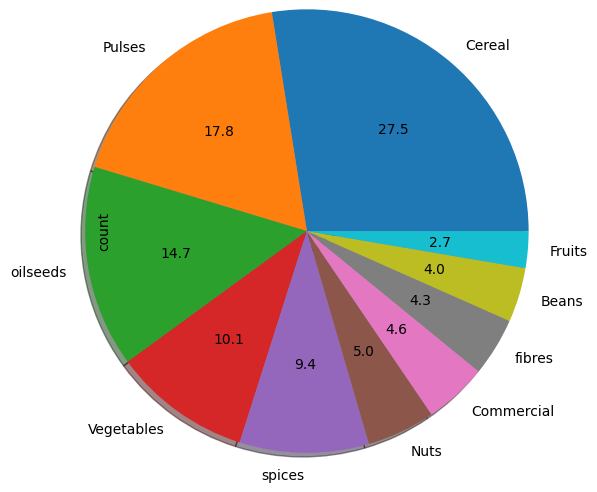

In [52]:
df1=data['cat_crop'].value_counts()
df1.plot(kind='pie',radius=1.5,autopct='%1.1f',shadow=True)
plt.tick_params(labelsize=10)

#### Each type of column requires various area for various season

In [53]:
data.columns

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'Production', 'cat_crop'],
      dtype='object')

In [54]:
temp1 = data.groupby(by='Crop_Year')['Area'].mean().reset_index()

temp2 = data.groupby(by='Crop_Year')['Production'].sum().reset_index()

df=pd.merge(temp1,temp2,right_index=True,left_index=True)

In [55]:
temp2

Crop_Year    Production
0        1997  8.512329e+08
1        1998  5.825321e+09
2        1999  6.434666e+09
3        2000  7.449709e+09
4        2001  7.465541e+09
5        2002  7.696955e+09
6        2003  7.917974e+09
7        2004  8.189462e+09
8        2005  8.043757e+09
9        2006  8.681913e+09
10       2007  6.879442e+09
11       2008  7.717018e+09
12       2009  7.660494e+09
13       2010  6.307609e+09
14       2011  1.430890e+10
15       2012  8.171055e+09
16       2013  1.290359e+10
17       2014  8.664541e+09
18       2015  6.935065e+06

In [56]:
temp1

Crop_Year          Area
0        1997  26038.324081
1        1998  14795.911383
2        1999  12749.174021
3        2000  12195.811997
4        2001  12434.568019
5        2002   9514.310063
6        2003   9905.217197
7        2004  12105.398306
8        2005  12051.210715
9        2006  12205.838055
10       2007  10700.722146
11       2008  12013.561841
12       2009  12029.417665
13       2010  12803.725932
14       2011  11138.374385
15       2012  11506.241732
16       2013  10501.068370
17       2014  10702.086481
18       2015   8200.174688

In [57]:
df.head()

Crop_Year_x          Area  Crop_Year_y    Production
0         1997  26038.324081         1997  8.512329e+08
1         1998  14795.911383         1998  5.825321e+09
2         1999  12749.174021         1999  6.434666e+09
3         2000  12195.811997         2000  7.449709e+09
4         2001  12434.568019         2001  7.465541e+09

### Rice

In [58]:
rice_df=data[data['Crop']=='Rice']
rice_df.head()

State_Name District_Name  Crop_Year       Season  Crop  \
2   Andaman and Nicobar Islands      NICOBARS       2000  Kharif       Rice   
12  Andaman and Nicobar Islands      NICOBARS       2001  Kharif       Rice   
18  Andaman and Nicobar Islands      NICOBARS       2002  Kharif       Rice   
27  Andaman and Nicobar Islands      NICOBARS       2003  Kharif       Rice   
36  Andaman and Nicobar Islands      NICOBARS       2004  Kharif       Rice   

      Area  Production cat_crop  
2   102.00      321.00   Cereal  
12   83.00      300.00   Cereal  
18  189.20      510.84   Cereal  
27   52.00       90.17   Cereal  
36   52.94       72.57   Cereal

<AxesSubplot:xlabel='Season', ylabel='Production'>

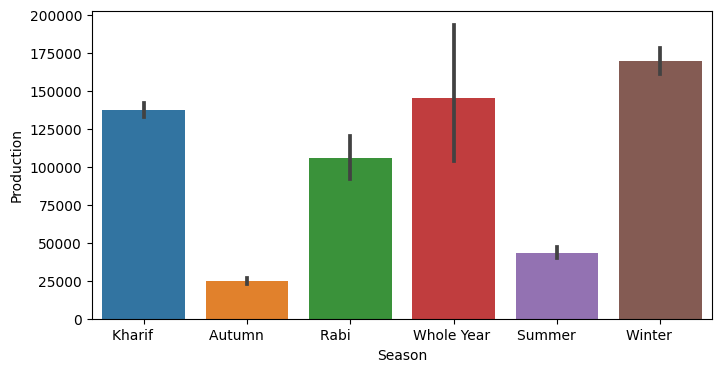

In [59]:
#Rice Production

plt.figure(figsize=(8,4))
sns.barplot(data=rice_df,x='Season',y='Production')

### Statewise Rice Production

In [60]:
rice_df.columns

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'Production', 'cat_crop'],
      dtype='object')

In [61]:
rice_df.groupby('State_Name')['Production'].sum().reset_index().sort_values(by='Production')

State_Name    Production
5                    Chandigarh  3.853000e+03
0   Andaman and Nicobar Islands  2.230061e+05
26                       Sikkim  3.831360e+05
7        Dadra and Nagar Haveli  4.548650e+05
23                   Puducherry  9.859580e+05
20                      Mizoram  1.138604e+06
11             Himachal Pradesh  1.419350e+06
8                           Goa  1.432244e+06
25                    Rajasthan  2.684728e+06
2             Arunachal Pradesh  2.709477e+06
19                    Meghalaya  3.531474e+06
18                      Manipur  3.850798e+06
12           Jammu and Kashmir   4.116594e+06
21                     Nagaland  5.269790e+06
13                    Jharkhand  7.527412e+06
31                  Uttarakhand  9.195479e+06
15                       Kerala  1.059335e+07
29                      Tripura  1.068501e+07
9                       Gujarat  1.908420e+07
16               Madhya Pradesh  2.762268e+07
17                  Maharashtra  4.300863e+07
10                      Haryana  4.931830e+07
14                    Karnataka  6.583707e+07
28                   Telangana   6.919568e+07
3                         Assam  7.180109e+07
6                  Chhattisgarh  8.149862e+07
4                         Bihar  9.202292e+07
27                   Tamil Nadu  1.001227e+08
22                       Odisha  1.194227e+08
1                Andhra Pradesh  1.437425e+08
24                       Punjab  1.797020e+08
30                Uttar Pradesh  2.187934e+08
32                  West Bengal  2.580928e+08

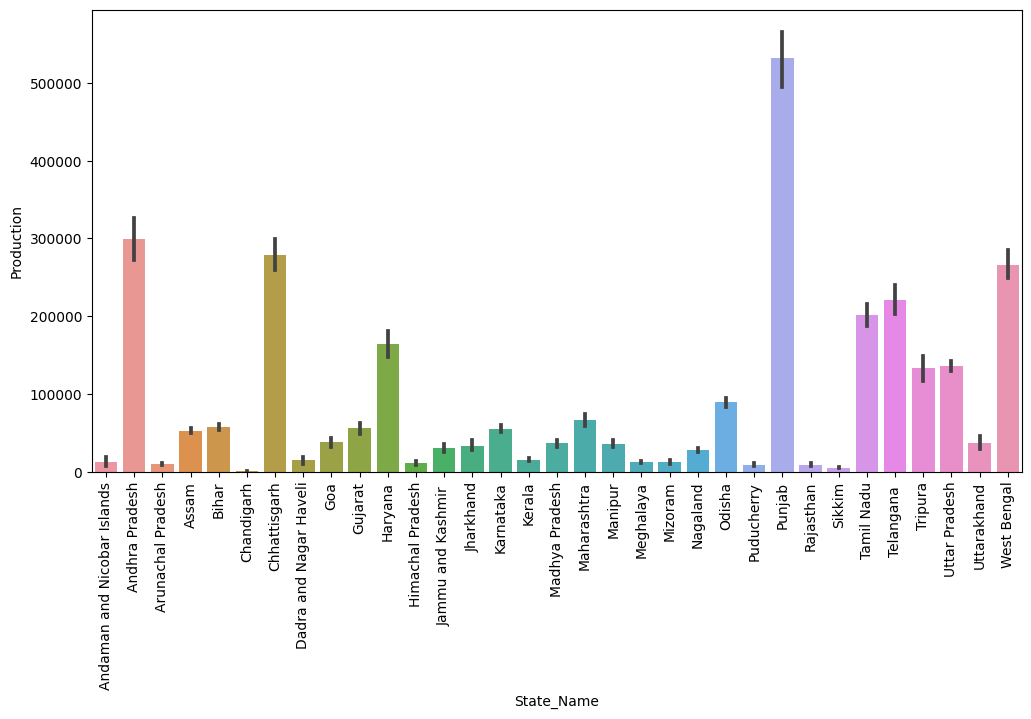

In [62]:
plt.figure(figsize=(12,6))
sns.barplot(data=rice_df,x='State_Name',y='Production')
plt.xticks(rotation=90)
plt.show()

In [63]:
a=rice_df.groupby('State_Name')['Production'].mean().reset_index().sort_values(by='Production')

In [64]:
a

State_Name     Production
5                    Chandigarh     296.384615
26                       Sikkim    5321.333333
23                   Puducherry    8803.196429
25                    Rajasthan    9009.154362
2             Arunachal Pradesh    9924.822711
11             Himachal Pradesh   10752.651515
20                      Mizoram   12112.808511
19                    Meghalaya   12347.811189
0   Andaman and Nicobar Islands   13118.003529
7        Dadra and Nagar Haveli   14673.064516
15                       Kerala   15264.189597
21                     Nagaland   27735.736842
12           Jammu and Kashmir    30493.291852
13                    Jharkhand   33160.405022
18                      Manipur   35988.766355
16               Madhya Pradesh   36879.411215
31                  Uttarakhand   37379.995935
8                           Goa   37690.631579
3                         Assam   52950.656342
14                    Karnataka   55093.784762
9                       Gujarat   55639.067055
4                         Bihar   57478.402249
17                  Maharashtra   65964.153374
22                       Odisha   89054.990306
29                      Tripura  133562.637500
30                Uttar Pradesh  135812.140906
10                      Haryana  164394.333333
27                   Tamil Nadu  201860.213710
28                   Telangana   221072.447284
32                  West Bengal  266349.689370
6                  Chhattisgarh  279104.856164
1                Andhra Pradesh  298840.862786
24                       Punjab  531662.721893

Text(0.5, 1.0, 'Statewise Rice Production')

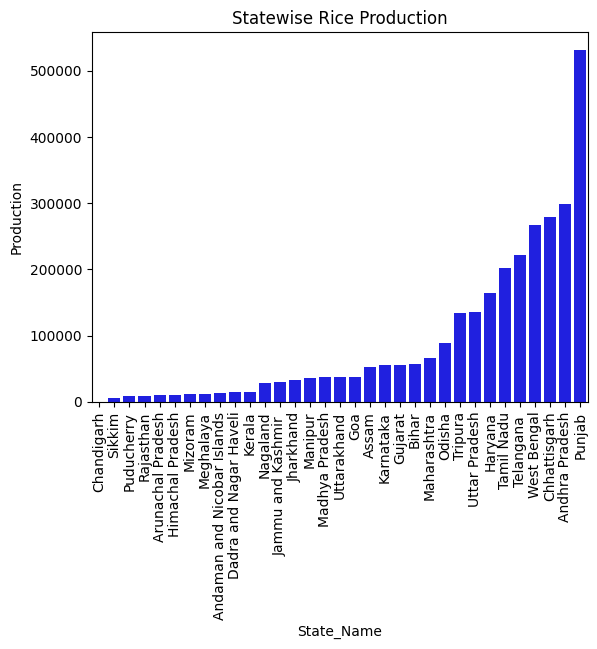

In [65]:
sns.barplot(data=a,x='State_Name',y='Production',color='blue')
plt.xticks(rotation=90)
plt.title('Statewise Rice Production')

In [66]:
#PUNJAB is the topmost rice producing state

### Area wise Rice Production

In [67]:
rice_df.columns

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'Production', 'cat_crop'],
      dtype='object')

In [68]:
rice_df['Area']

2            102.00
12            83.00
18           189.20
27            52.00
36            52.94
            ...    
246049       516.00
246052    302274.00
246058       264.00
246086       306.00
246089    279151.00
Name: Area, Length: 15082, dtype: float64

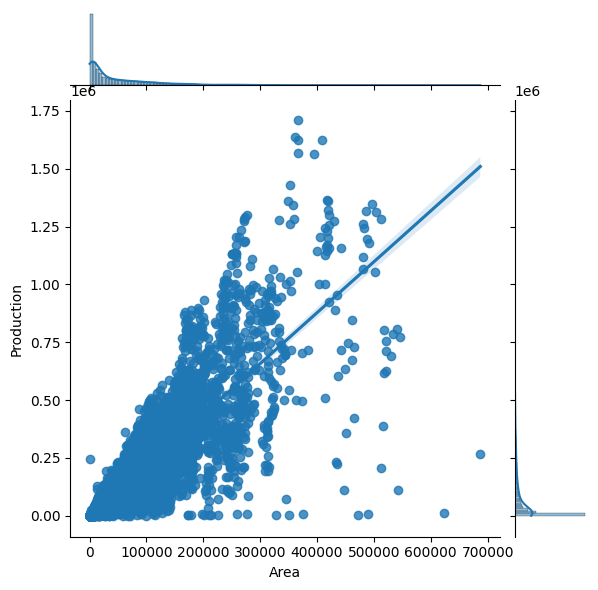

In [69]:
sns.jointplot(data=rice_df,x='Area',y='Production',kind='reg')
# plt.show()

## INSIGHT:

#### From Data Visualization : Rice Production mostly depends on Season,Area,State(place)

### Rice production Over the years

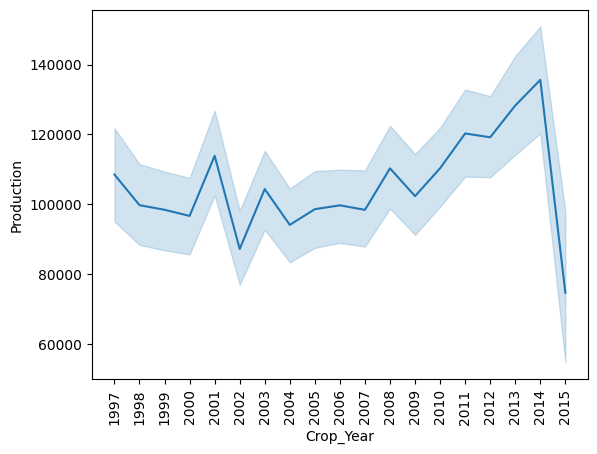

In [70]:
sns.lineplot(data=rice_df,x='Crop_Year',y='Production')
plt.xticks(ticks=np.arange(1997,2016),rotation=90)
# plt.grid()
plt.show()

# Coconut

In [71]:
data.columns

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'Production', 'cat_crop'],
      dtype='object')

In [72]:
coc_df=data[data['Crop']=='Coconut ']

<AxesSubplot:xlabel='Season', ylabel='Production'>

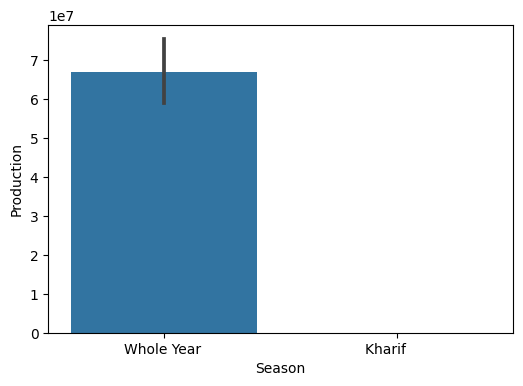

In [73]:
#Seasonal Coconut Production
plt.figure(figsize=(6,4))
sns.barplot(data=coc_df,x='Season',y='Production')

In [74]:
coc_df.groupby('Season')['Production'].sum()

Season
Kharif         1.265920e+05
Whole Year     1.299815e+11
Name: Production, dtype: float64

In [75]:
coc_df.groupby('Season')['Production'].mean()

Season
Kharif         9.737846e+03
Whole Year     6.682854e+07
Name: Production, dtype: float64

In [76]:
c1=coc_df.groupby('Season')['Production'].sum().reset_index()
c1

Season    Production
0  Kharif       1.265920e+05
1  Whole Year   1.299815e+11

<AxesSubplot:xlabel='Season', ylabel='Production'>

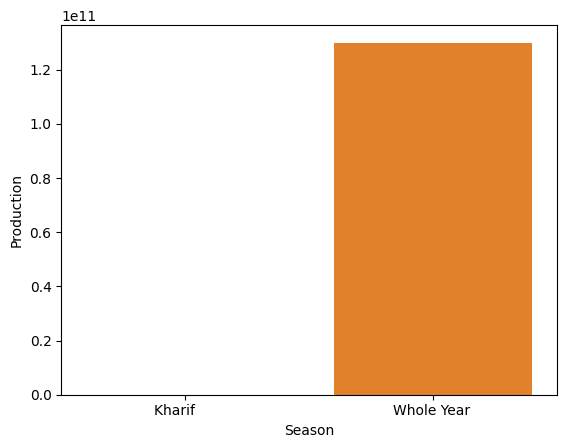

In [77]:
sns.barplot(data=c1,x='Season',y='Production')

<AxesSubplot:xlabel='Season', ylabel='Production'>

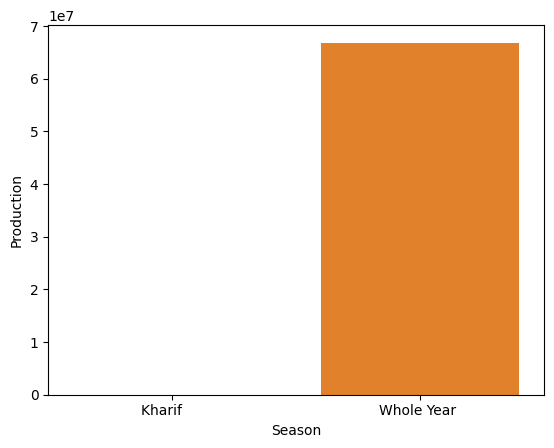

In [78]:
c2=coc_df.groupby('Season')['Production'].mean().reset_index()
sns.barplot(data=c2,x='Season',y='Production')

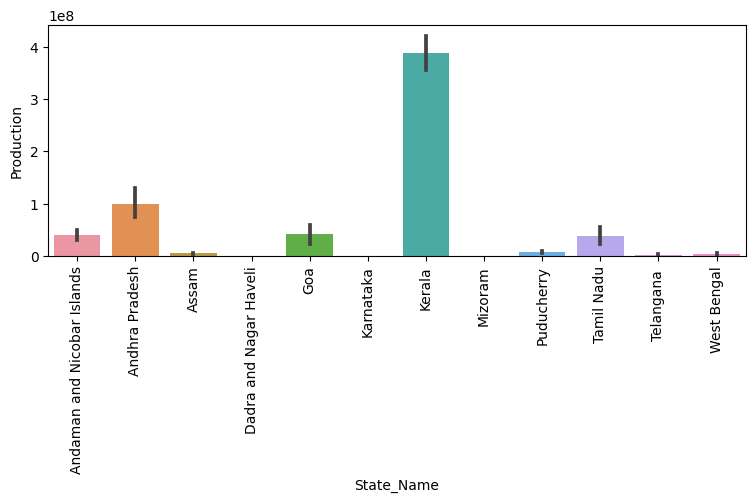

In [79]:
# Statewise Coconut Production

plt.figure(figsize=(9,3))
sns.barplot(x='State_Name',y='Production',data=coc_df)
plt.xticks(rotation=90)
plt.show()

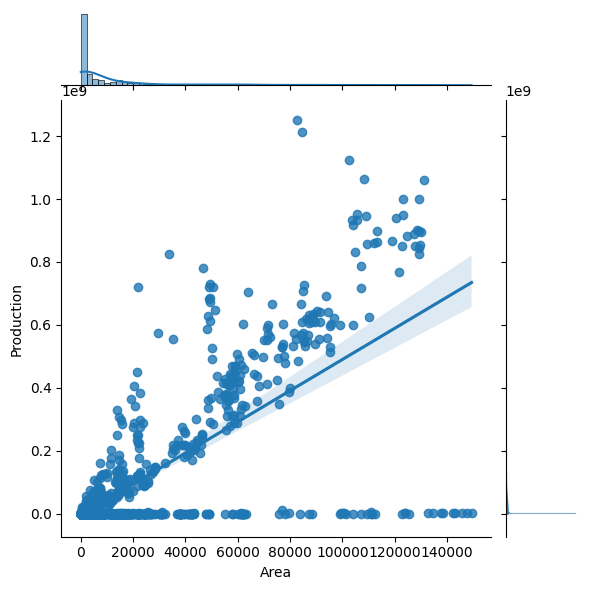

In [80]:
#Areawise Coconut Production

sns.jointplot(data=coc_df,x='Area',y='Production',kind='reg')

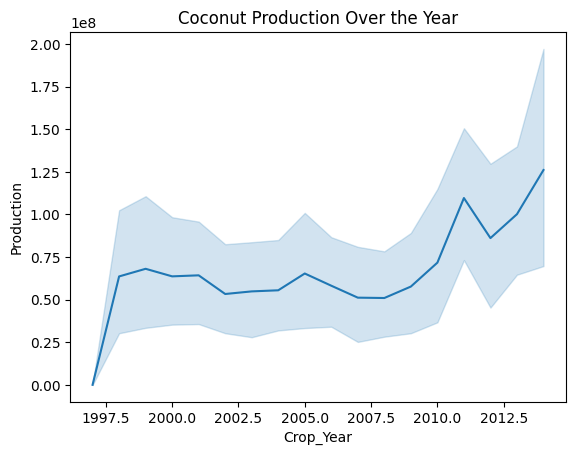

In [81]:
#Coconut Production Over the Year

sns.lineplot(data=coc_df,x='Crop_Year',y='Production')

plt.title('Coconut Production Over the Year')
plt.show()

## Insight from Coconut Production:

#### > Coconut Production is directly proportional to area
#### > Its production is gradually increasing over a time of period
#### > Production is high in Kerala State
#### > It does not depend on season
#### > Production is increasing by year

## Sugarcane

In [82]:
data.columns

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'Production', 'cat_crop'],
      dtype='object')

In [83]:
sug_df = data[data['Crop']=='Sugarcane']
sug_df.head()

State_Name District_Name  Crop_Year       Season  \
7   Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    
16  Andaman and Nicobar Islands      NICOBARS       2001  Whole Year    
26  Andaman and Nicobar Islands      NICOBARS       2002  Whole Year    
60  Andaman and Nicobar Islands      NICOBARS       2006  Whole Year    
65  Andaman and Nicobar Islands      NICOBARS       2010  Autumn        

         Crop  Area  Production    cat_crop  
7   Sugarcane   1.0        2.00  Commercial  
16  Sugarcane   1.0        1.00  Commercial  
26  Sugarcane   5.0       40.00  Commercial  
60  Sugarcane   0.2        0.50  Commercial  
65  Sugarcane  13.4       41.75  Commercial

<AxesSubplot:xlabel='Season', ylabel='Production'>

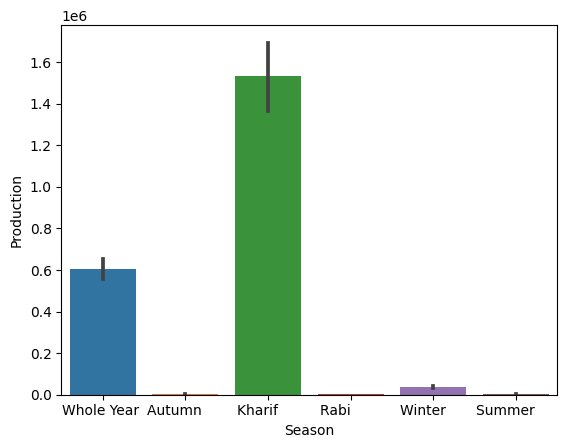

In [84]:
#Seasonal Sugarcane Production

sns.barplot(data=sug_df,x='Season',y='Production')

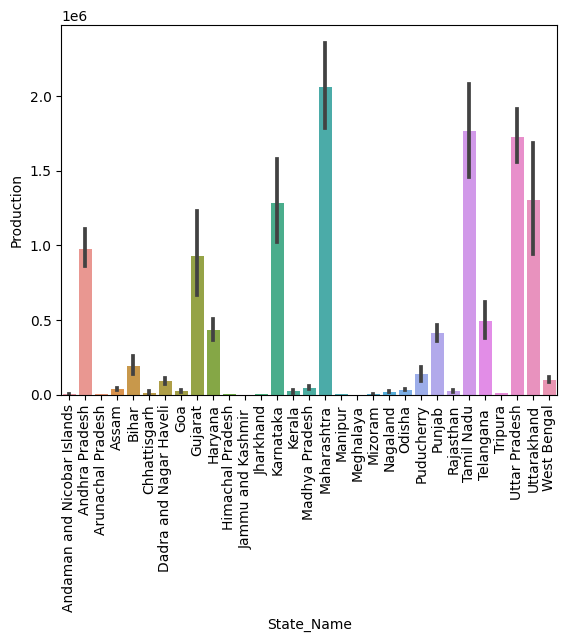

In [85]:
#Statewise Sugarcane Production

sns.barplot(data=sug_df,x='State_Name',y='Production')

plt.xticks(rotation=90)

plt.show()

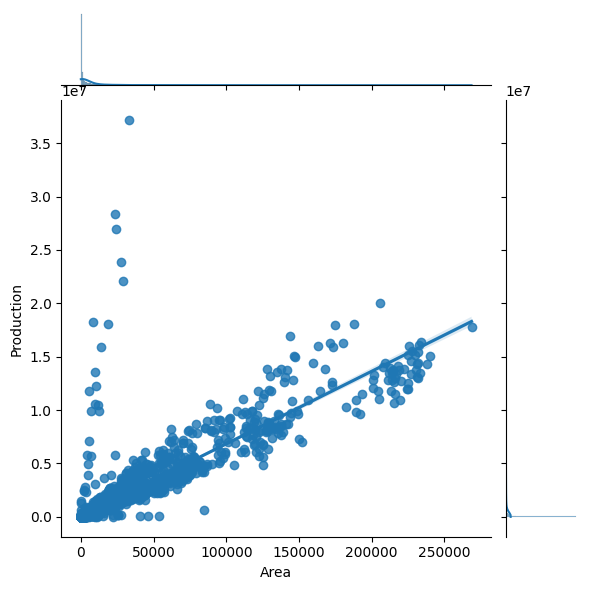

In [86]:
#Areawise Sugarcane Production

sns.jointplot(data=sug_df,x='Area',y='Production',kind='reg')

<AxesSubplot:xlabel='Crop_Year', ylabel='Production'>

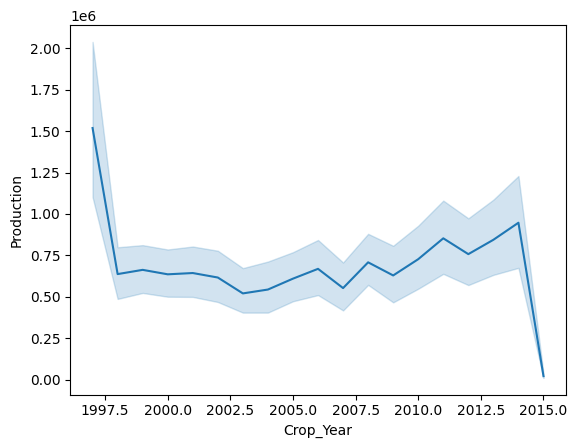

In [87]:
#Sugarcane Production Over the Years

sns.lineplot(data=sug_df,x='Crop_Year',y='Production')

# Insight from Sugarcane Production

#### Sugarcane Production is directly proportional to Area
#### And the production is high in some states, with Maharashtra topping the production
#### Production is decreasing over the years